# Mask a Raster Using Threshold Values in Python
In this tutorial, we will walk through how to remove parts of a raster based on pixel values using a mask we create. A mask raster layer contains pixels that are not used in the analysis. In Python, these pixels are assigned a value of nan (not a number). 

<img src="http://neon-workwithdata.github.io/neon-data-institute-2016/images/spatialData/raster_masks.jpg" style="width: 750px;"/>

## Import LiDAR Data

To start, we will open the NEON LiDAR Digital Surface and Digital Terrain Models (DSM and DTM) which are in Geotiff (.tif) format. For this exercise we will continue working with the TEAK data subset. 

In [1]:
import numpy as np
import gdal
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import TEAK aspect raster generated in previous lesson
aspectNS_filename = 'teak_nsAspect.tif'
aspectNS_dataset = gdal.Open(aspectNS_filename)
#Display the dataset dimensions:
rows_aspNS = aspectNS_dataset.RasterYSize; print('x:',rows_aspNS)
cols_aspNS = aspectNS_dataset.RasterXSize; print('y:',cols_aspNS)
print('bands:',aspectNS_dataset.RasterCount)
print('driver:',aspectNS_dataset.GetDriver().LongName)
print('geotransform:',aspectNS_dataset.GetGeoTransform())
print('projection:',aspectNS_dataset.GetProjection())

aspectNS_mapinfo = aspectNS_dataset.GetGeoTransform()
xMin = aspectNS_mapinfo[0]
yMax = aspectNS_mapinfo[3]

xMax = xMin + aspectNS_dataset.RasterXSize/aspectNS_mapinfo[1] #divide by pixel width 
yMin = yMax - aspectNS_dataset.RasterYSize/aspectNS_mapinfo[5] #divide by pixel height (note sign +/-)
aspectNS_ext = (xMin,xMax,yMin,yMax)
print('TEAK Aspect NS Raster Extent:',aspectNS_ext)

#Convert CHM raster to NumPy array
aspectNS_raster = aspectNS_dataset.GetRasterBand(1)

noDataVal = aspectNS_raster.GetNoDataValue()
print('no data value:',noDataVal)

scaleFactor = aspectNS_raster.GetScale()
print('scale factor:',scaleFactor)

aspectNS_stats = aspectNS_raster.GetStatistics(True,True)
print('CHM Statistics: Minimum=%.2f, Maximum=%.2f, Mean=%.3f, StDev=%.3f' % 
      (aspectNS_stats[0], aspectNS_stats[1], aspectNS_stats[2], aspectNS_stats[3]))

aspectNS_array = aspectNS_dataset.GetRasterBand(1).ReadAsArray(0,0,cols_aspNS,rows_aspNS).astype(np.float)
print(aspectNS_array)

x: 577
y: 543
bands: 1
driver: GeoTIFF
geotransform: (325963.0, 1.0, 0.0, 4103482.0, 0.0, -1.0)
projection: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
TEAK Aspect NS Raster Extent: (325963.0, 326506.0, 4104059.0, 4103482.0)
no data value: None
scale factor: 1.0
CHM Statistics: Minimum=0.00, Maximum=2.00, Mean=0.557, StDev=0.840
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0. 

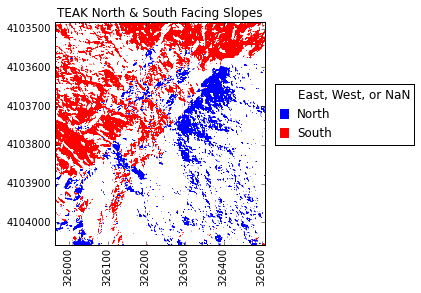

In [3]:
# Plot classified aspect (N-S) array
from matplotlib import colors
aspectNS_array = aspectNS_array[::-1] #?? do raster arrays need to be inversed to look right as geotif?
fig, ax = plt.subplots()
cmapNS = colors.ListedColormap(['white','blue','red'])
plt.imshow(aspectNS_array,extent=aspectNS_ext,cmap=cmapNS)
plt.title('TEAK North & South Facing Slopes')
ax=plt.gca(); ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees

# Create custom legend to label N & S
import matplotlib.patches as mpatches
white_box = mpatches.Patch(color='white',edgecolor='red',label='East, West, or NaN')
blue_box = mpatches.Patch(color='blue', label='North')
red_box = mpatches.Patch(color='red', label='South')
ax.legend(handles=[white_box,blue_box,red_box],handlelength=0.7,bbox_to_anchor=(1.05, 0.45), 
          loc='lower left', borderaxespad=0.)

In [4]:
# Import TEAK NDVI Geotif
ndvi_filename = 'TEAK_NDVI.tif'
ndvi_dataset = gdal.Open(ndvi_filename)
#Display the dataset dimensions:
rows_ndvi = ndvi_dataset.RasterYSize; print('x:',rows_ndvi)
cols_ndvi = ndvi_dataset.RasterXSize; print('y:',cols_ndvi)
print('NDVI Raster Info:')
print('driver:',ndvi_dataset.GetDriver().LongName)
print('bands:',ndvi_dataset.RasterCount)
print('geotransform:',ndvi_dataset.GetGeoTransform())
print('projection:',ndvi_dataset.GetProjection())

ndvi_mapinfo = ndvi_dataset.GetGeoTransform()
xMin = ndvi_mapinfo[0]
yMax = ndvi_mapinfo[3]

xMax = xMin + ndvi_dataset.RasterXSize/ndvi_mapinfo[1] #divide by pixel width 
yMin = yMax - ndvi_dataset.RasterYSize/ndvi_mapinfo[5] #divide by pixel height (note sign +/-)
ndvi_ext = (xMin,xMax,yMin,yMax)
print('raster extent:',aspectNS_ext)

#Convert CHM raster to NumPy array
ndvi_raster = ndvi_dataset.GetRasterBand(1)
noDataVal = ndvi_raster.GetNoDataValue()
scaleFactor = ndvi_raster.GetScale()

print('no data value:',noDataVal)
print('scale factor:',scaleFactor)

ndvi_stats = ndvi_raster.GetStatistics(True,True)
print('CHM Statistics: Minimum=%.2f, Maximum=%.2f, Mean=%.3f, StDev=%.3f' % 
      (ndvi_stats[0], ndvi_stats[1], ndvi_stats[2], ndvi_stats[3]))

ndvi_array = ndvi_dataset.GetRasterBand(1).ReadAsArray(0,0,cols_ndvi,rows_ndvi).astype(np.float)
print(ndvi_array)

x: 577
y: 543
NDVI Raster Info:
driver: GeoTIFF
bands: 1
geotransform: (325963.0, 1.0, 0.0, 4103482.0, 0.0, -1.0)
projection: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
raster extent: (325963.0, 326506.0, 4104059.0, 4103482.0)
no data value: -9999.0
scale factor: 1.0
CHM Statistics: Minimum=-0.23, Maximum=0.92, Mean=0.460, StDev=0.265
[[ 0.14955075  0.23516883  0.26661631 ...,  0.5544554   0.31534567
   0.25508198]
 [ 0.13037811  0.1521152

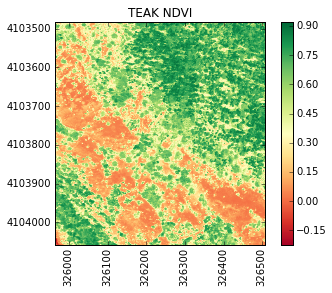

In [5]:
# Plot NDVI array
# from matplotlib import colors
import copy
# ndvi_array = copy.copy(ndvi_array)
# ndvi_array = ndvi_array[::-1] #?? do raster arrays need to be inversed to look right as geotif?
fig, ax = plt.subplots()
plt.imshow(ndvi_array,extent=ndvi_ext)
plt.colorbar(); plt.set_cmap('RdYlGn'); 
plt.title('TEAK NDVI')
ax=plt.gca(); ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees

(array([  1.20000000e+01,   4.00000000e+01,   3.20000000e+01,
          2.90000000e+01,   1.92910000e+04,   3.19060000e+04,
          2.32050000e+04,   1.54490000e+04,   1.34870000e+04,
          1.31000000e+04,   1.37930000e+04,   1.44190000e+04,
          1.61150000e+04,   1.82210000e+04,   2.23900000e+04,
          2.85470000e+04,   3.22770000e+04,   3.01150000e+04,
          1.92900000e+04,   1.59300000e+03]),
 array([-0.22528161, -0.16792557, -0.11056954, -0.0532135 ,  0.00414253,
         0.06149857,  0.11885461,  0.17621064,  0.23356668,  0.29092272,
         0.34827875,  0.40563479,  0.46299083,  0.52034686,  0.5777029 ,
         0.63505894,  0.69241497,  0.74977101,  0.80712705,  0.86448308,
         0.92183912]),
 <a list of 20 Patch objects>)

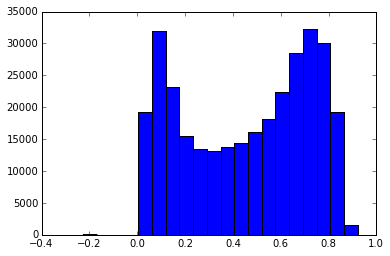

In [6]:
#Plot a histogram of NDVI values with 20 bins
plt.hist(ndvi_array.flatten(),20)

## Mask Data by Aspect and NDVI
Now that we have imported and converted the classified aspect and NDVI rasters to arrays, we can use information from these to find create a new raster consisting of pixels are North facing and have an NDVI > 0.6.

[[        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,  0.69771683  0.76641864
   0.76641864]
 ..., 
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]]


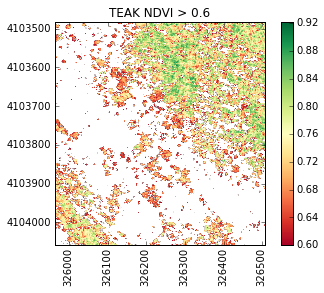

In [7]:
#Mask out pixels that are north facing:
import copy
import numpy.ma as ma

#first copy the ndvi array so we can further select a subset
ndvi_gtpt6 = copy.copy(ndvi_array)
ndvi_gtpt6[ndvi_array<0.6]=np.nan
print(ndvi_gtpt6)

plt.imshow(ndvi_gtpt6,extent=ndvi_ext)
plt.colorbar(); plt.set_cmap('RdYlGn'); 
plt.title('TEAK NDVI > 0.6')
ax=plt.gca(); ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees

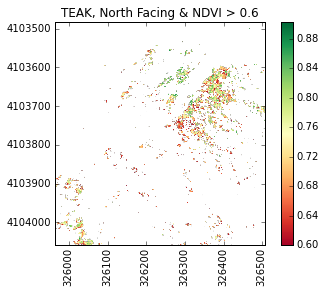

In [8]:
#Now include additional requirement that slope is North-facing (i.e. aspectNS_array = 1)
ndvi_gtpt6_Nslope = copy.copy(ndvi_gtpt6)
ndvi_gtpt6_Nslope[aspectNS_array!=1]=np.nan

plt.imshow(ndvi_gtpt6_Nslope,extent=ndvi_ext)
plt.colorbar(); plt.set_cmap('RdYlGn'); 
plt.title('TEAK, North Facing & NDVI > 0.6')
ax=plt.gca(); ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees

## Export Masked Raster to Geotiff

In [12]:
# %load ../hyperspectral_hdf5/array2raster.py
"""
Array to Raster Function from https://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html)
"""

import gdal, osr #ogr, os, osr
import numpy as np


def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array,epsg):

    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]

    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Byte)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(epsg)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()

In [14]:
epsg = 32611 #WGS 84, UTM Zone 11N
array2raster('TEAK_Nslope_ndvi_gtpt6.tif',(xMin,yMax),1,-1,ndvi_gtpt6_Nslope,epsg)